# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [4]:
iris=pd.read_csv('iris.csv')
iris

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [5]:
iris.shape

(150, 6)

In [6]:
iris.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
iris.isnull().sum()

Unnamed: 0      0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [22]:
iris=iris.drop('Unnamed: 0',axis=1)
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Exploratory Data Analysis

In [23]:
iris['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [24]:
n1=len(iris[iris['Species']=='setosa'])
n2=len(iris[iris['Species']=='versicolor'])
n3=len(iris[iris['Species']=='virginica'])

print('No. of Setosa in dataset : ', n1)
print('No. of Versicolor in dataset : ', n2)
print('No. of Virginica in dataset : ', n3)
    

No. of Setosa in dataset :  50
No. of Versicolor in dataset :  50
No. of Virginica in dataset :  50


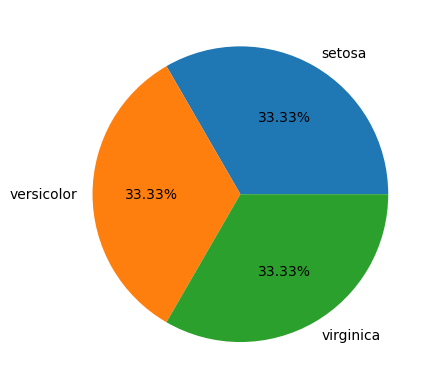

In [26]:
#plotting the pie chart
x=[n1,n2,n3]
plt.pie(x=x,autopct='%1.2f%%',labels=iris['Species'].unique())
plt.show();

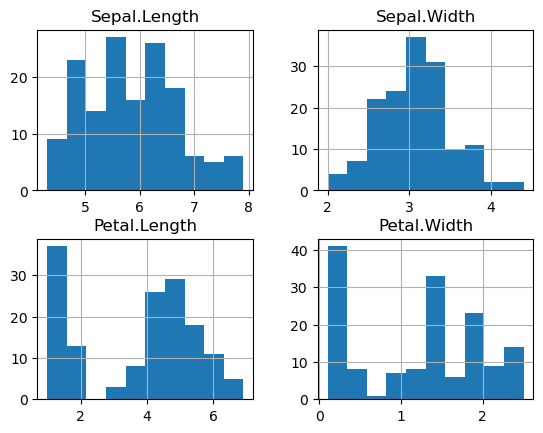

In [27]:
#plotting histogram
iris.hist()
plt.show()

<Axes: xlabel='Species', ylabel='Petal.Width'>

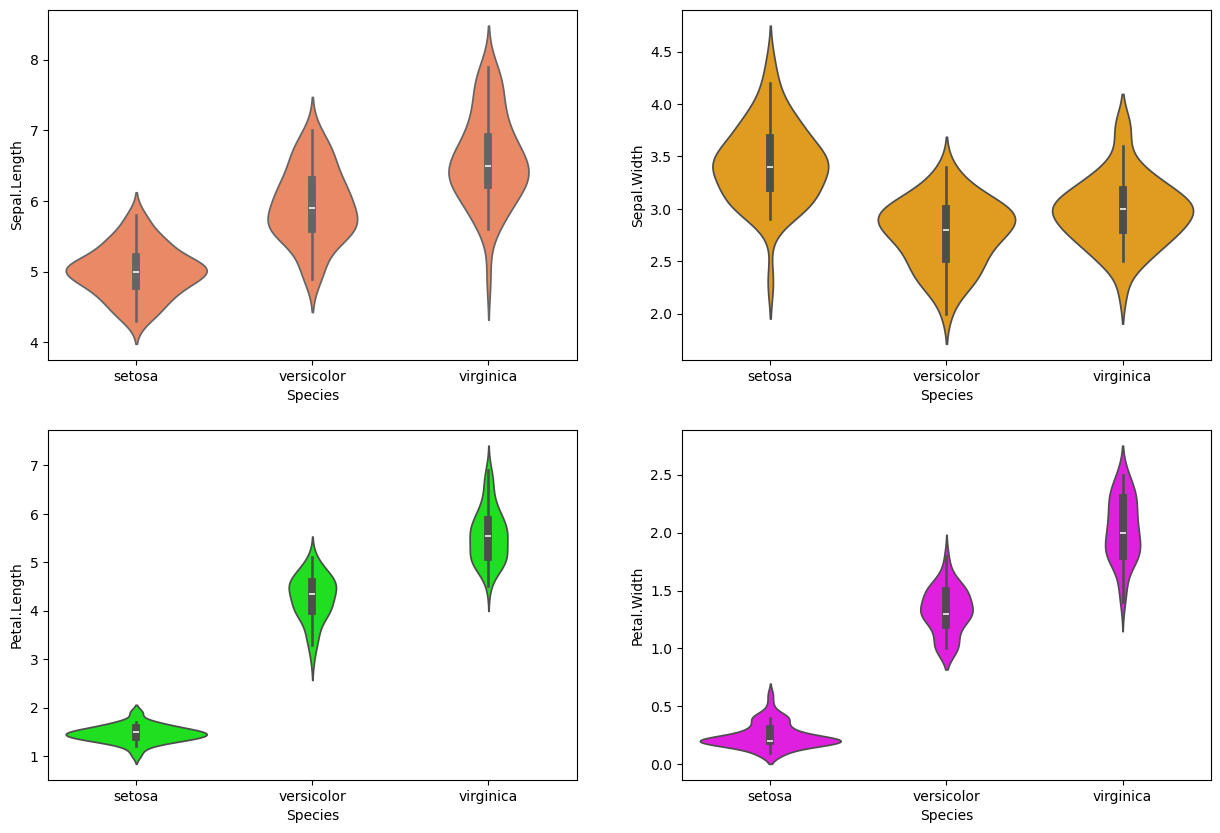

In [36]:
#plotting violinplot
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x=iris.Species,y=iris['Sepal.Length'], data=iris,color='coral')
plt.subplot(2,2,2)
sns.violinplot(x=iris.Species,y=iris['Sepal.Width'], data=iris,color='orange')
plt.subplot(2,2,3)
sns.violinplot(x=iris.Species,y=iris['Petal.Length'], data=iris,color='lime')
plt.subplot(2,2,4)
sns.violinplot(x=iris.Species,y=iris['Petal.Width'], data=iris,color='fuchsia')

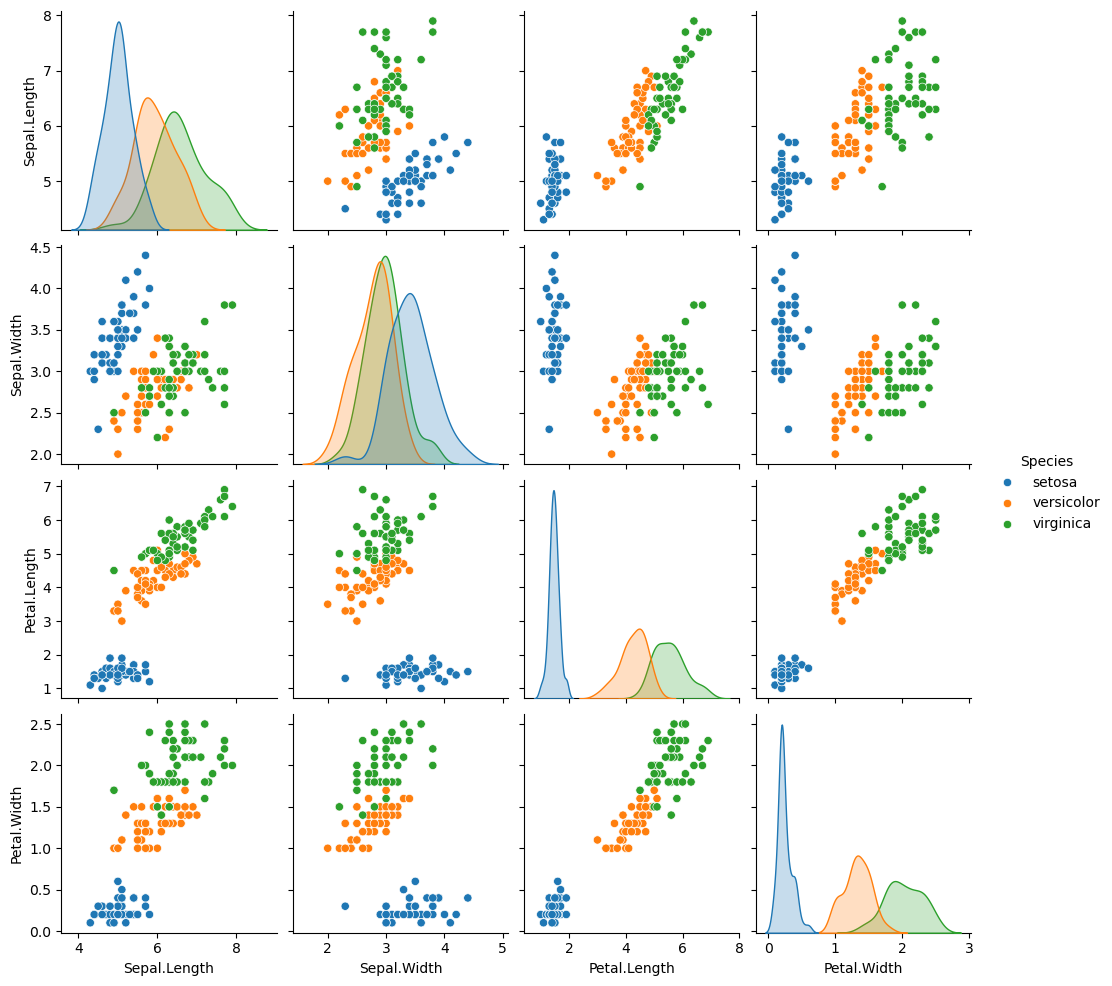

In [37]:
sns.pairplot(iris,hue='Species')

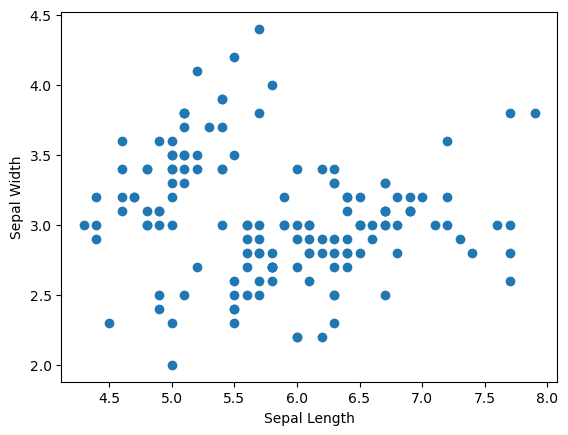

In [42]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(x=iris['Sepal.Length'], y=iris['Sepal.Width'])

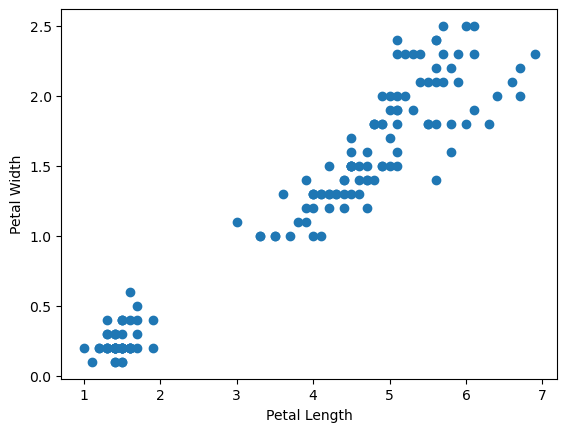

In [43]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(x=iris['Petal.Length'], y=iris['Petal.Width'])

# Modelling

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [45]:
#splitting the data between X and y
X=iris.drop('Species',axis=True)
y=iris['Species']
X.shape , y.shape

((150, 4), (150,))

In [54]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=30)

## Logistic Regression

In [55]:
lrmodel=LogisticRegression()
lrmodel.fit(X_train,y_train)
y_pred1=lrmodel.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test,y_pred1))

Accuracy score:  0.9555555555555556


## SVC

In [56]:
svcmodel=SVC()
svcmodel.fit(X_train,y_train)
y_pred2=svcmodel.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test,y_pred2))

Accuracy score:  0.9333333333333333


## Naive Bayes

In [57]:
gnbmodel=GaussianNB()
gnbmodel.fit(X_train,y_train)
y_pred3=gnbmodel.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test,y_pred3))

Accuracy score:  0.9555555555555556


## KNN

In [58]:
knnmodel=KNeighborsClassifier()
knnmodel.fit(X_train,y_train)
y_pred4=knnmodel.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test,y_pred4))

Accuracy score:  0.9333333333333333


## Decision Tree Classifier 

In [59]:
dtmodel=DecisionTreeClassifier()
dtmodel.fit(X_train,y_train)
y_pred5=dtmodel.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test,y_pred5))

Accuracy score:  0.9333333333333333


## Random Forest Classifier

In [60]:
rfmodel=RandomForestClassifier()
rfmodel.fit(X_train,y_train)
y_pred6=rfmodel.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test,y_pred6))

Accuracy score:  0.9333333333333333


In [61]:
#creating a dataframe
df=pd.DataFrame({'Model':['Logistic Regression', 'SVC', 'Naive Bayes', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier'],
                'Score':[0.956,0.934,0.956,0.934,0.934,0.934]})
df=df.sort_values(by='Score', ascending=False)
df

,Model,Score
0,Logistic Regression,0.956
2,Naive Bayes,0.956
1,SVC,0.934
3,KNN,0.934
4,Decision Tree Classifier,0.934
5,Random Forest Classifier,0.934


*We choose Naive Bayes as best performing model here*

# Saving the model

In [62]:
import pickle as pkl
pkl.dump(gnbmodel, open('final model.pkl', 'wb'))